In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Overview**

In [2]:
data = pd.read_csv("C:/Users/johnr/OneDrive/Documents/Tesla Predictions/TSLA Testing.csv")
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
1,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,210.688220,215.466162,205.595405,210.655936,210.655936,1.208421e+08
std,51.496805,52.164593,50.789028,51.421134,51.421134,4.971209e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,8.141040e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.102522e+08
75%,247.361671,251.520004,241.084999,245.224998,245.224998,1.569024e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


**EDA**

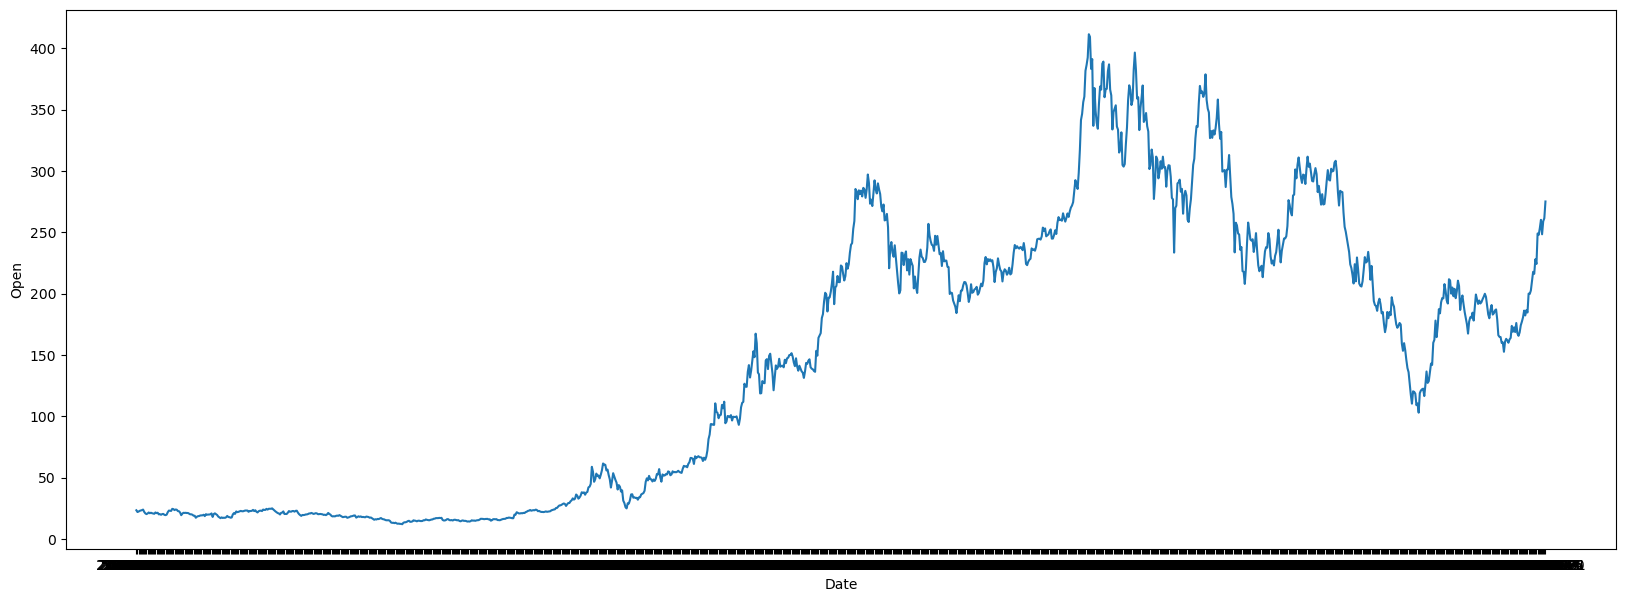

In [5]:
plt.figure(figsize=(20,7))
sns.lineplot(data = data, x = 'Date', y = 'Open')
plt.show()

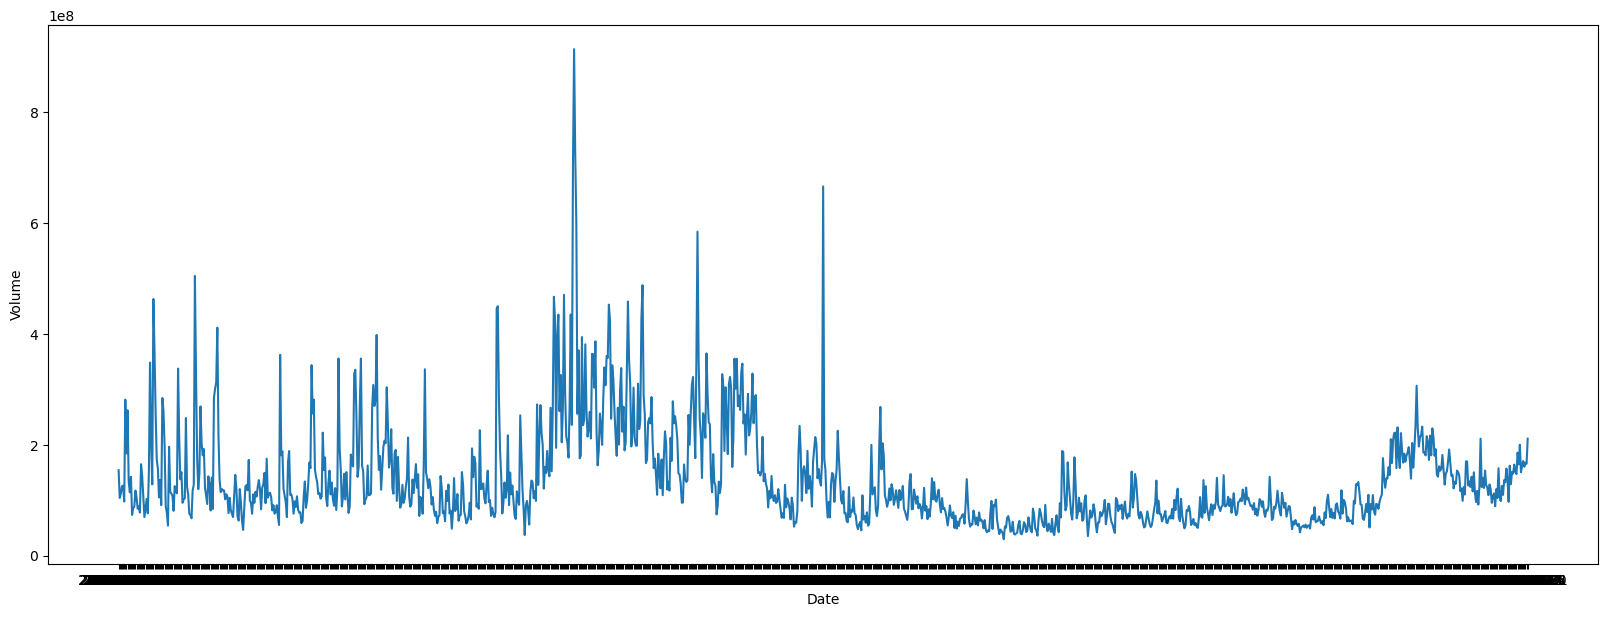

In [6]:
plt.figure(figsize=(20,7))
sns.lineplot(data = data, x = 'Date', y = 'Volume')
plt.show()

SCALING AND TRAIN TEST SPLIT

In [55]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaledData = pd.DataFrame(standardScaler.fit_transform(data.drop('Date', axis = 1)),columns = standardScaler.feature_names_in_)
scaledData.head(2)

,Open,High,Low,Close,Adj Close,Volume
0,-1.089480,-1.094557,-1.096120,-1.101025,-1.101025,0.196429
1,-1.102061,-1.102472,-1.098833,-1.101390,-1.101390,-0.365039


In [56]:
X = pd.DataFrame(scaledData[['High', 'Low', 'Close', 'Adj Close', 'Volume']].copy())
Y = pd.Series(scaledData['Open'].copy())

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

Regression Model

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Fitting and predicting the model using LinearRegression 
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)
LRPredictions = pd.DataFrame(linearRegression.predict(X_test))

# Calculating Mean Absolute Error
print(mean_absolute_error(LRPredictions, Y_test))

0.01437899692349172


In [107]:
test_data = pd.read_csv("C:/Users/johnr/OneDrive/Documents/Tesla Predictions/TSLA training.csv")
real_stock_price = pd.DataFrame(test_data.iloc[:, 1:2])

In [133]:
testData_scaled = pd.DataFrame(standardScaler.fit_transform(test_data.drop('Date', axis = 1)),columns = standardScaler.feature_names_in_ )
predictionFeatures = testData_scaled[['High', 'Low', 'Close', 'Adj Close', 'Volume']]
predictionFeatures['Open'] = linearRegression.predict(predictionFeatures)


# predicted_stock_price = pd.DataFrame(linearRegression.predict(predictionFeatures))
# # predicted_stock_price.rename(columns = {0:'Open'}, inplace = True)
# # predicted_stock_price.head(2)

In [135]:
predictionFeatures = pd.DataFrame(standardScaler.inverse_transform(predictionFeatures), columns = standardScaler.feature_names_in_)
predictionFeatures.head(2)

,Open,High,Low,Close,Adj Close,Volume
0,241.653838,244.462030,230.713525,236.086670,190.242892,1.526912e+08
1,234.233401,239.131477,229.709360,235.070007,193.444397,1.428911e+08


In [137]:
test_data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
1,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600


In [138]:
real_stock_price = test_data['Open']
predicted_stock_price = predictionFeatures['Open']

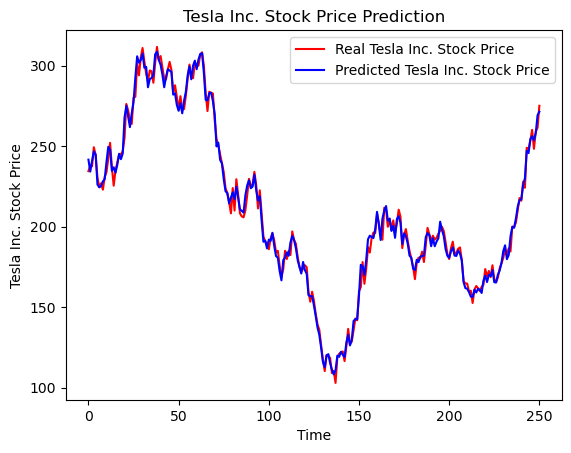

In [139]:
plt.plot(real_stock_price, color='red', label='Real Tesla Inc. Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()